## Importing Libraries

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

# To generate the for loops
import glob
import os
from matplotlib import ticker

## Reading the data

In [2]:
# Read infection time data
infection_data = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/MRSA - Master sheet.xlsx', index_col=0)

In [3]:
#TRY THIS ONE:
# Read temperature data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

#minutes = []
temp = []

for file in files:
    df = pd.read_excel(file)
    
    #file_min = df.iloc[:, 0]  # getting only the minutes
    file_temp = df.iloc[:, 3::2]  # slicing the data for only temperature
    
    # Ensure that the number of minutes matches the number of temperature columns
    num_temp_columns = file_temp.shape[1]
    #file_min = file_min[:num_temp_columns]
    
    # Iterate over every other column in file_temp
    for j in range(0, num_temp_columns):
        # Extract the specific temperature column and its corresponding minutes
        column_name = file_temp.columns[j]
        temperature = file_temp[column_name]
        #minutes_subset = file_min
        
        # Append the temperature and minutes to each lists
        #minutes.append(minutes_subset)
        temp.append(temperature)


## Creating Data Frames

In [4]:
# INFECTION DATA

infection_data = infection_data.iloc[:,[1,9]]
#infection_data.head()
infection_data = infection_data.T
#Transpose_infection

# Assign the values of the first row as the new column names
infection_data.columns = infection_data.iloc[0]

# Remove the first row (previous column names)
infection_data = infection_data[1:]
infection_data.head()

Strain-ID,C57Bl6-100,C57Bl6-101,CC002-557,CC002-558,CC002-559,CC015-390,CC015-391,CC015-392,CC038-582,CC038-583,...,CC058-317,CC058-318,CC058-319,CC061-565,CC001-364,CC001-366,CC003-225,CC017-455,CC017-456,CC036-299
Aprprox Infection Minute,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,...,10500,10500,10500,10500,10250,10250,10250,10250,10250,10250


In [5]:
# TEMPERATURE DATA
df_temp = pd.DataFrame(temp)
df_temp = df_temp.T
df_temp.head()

,CC006-315 EXP 2 MRSA CC Deg. C Data,CC006-316 EXP 2 MRSA CC Deg. C Data,CC006-317 EXP 2 MRSA CC Deg. C Data,CC019-1392 EXP 2 MRSA CC Deg. C Data,CC019-1393 EXP 2 MRSA CC Deg. C Data,CC043-455 EXP 2 MRSA CC Deg. C Data,CC043-456 EXP 2 MRSA CC Deg. C Data,CC043-457 EXP 2 MRSA CC Deg. C Data,CC051-489 EXP 2 MRSA CC Deg. C Data,CC051-490 EXP 2 MRSA CC Deg. C Data,...,CC024-371 CC MRSA Exp 9 Deg. C Data,CC027-400 CC MRSA Exp 9 Deg. C Data,CC027-401 CC MRSA Exp 9 Deg. C Data,CC027-403 CC MRSA Exp 9 Deg. C Data,CC041-1752 CC MRSA Exp 9 Deg. C Data,CC041-1753 CC MRSA Exp 9 Deg. C Data,CC041-1754 CC MRSA Exp 9 Deg. C Data,CC041-1758 CC MRSA Exp 9 Deg. C Data,CC041-1759 CC MRSA Exp 9 Deg. C Data,CC041-1760 CC MRSA Exp 9 Deg. C Data
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.21,36.37,37.14,36.29,36.77,35.38,35.58,35.78,36.46,36.43,...,36.85,36.22,36.27,37.04,36.12,35.92,36.23,36.61,36.48,36.44
3,36.33,36.60,37.20,36.35,36.91,35.40,35.58,35.76,36.54,36.48,...,36.87,36.37,36.37,37.06,36.20,35.99,36.31,36.68,36.61,36.57
4,36.47,36.73,37.12,36.40,37.01,35.41,35.72,35.73,36.61,36.56,...,36.95,36.49,36.56,37.07,36.28,36.11,36.45,36.82,36.77,36.65


## Renaming the columns of temperature DataFrame

In [6]:
# Rename columns keeping only the first word
df_temp.columns = df_temp.columns.astype(str).str.split(' ').str[0]
df_temp.head()

,CC006-315,CC006-316,CC006-317,CC019-1392,CC019-1393,CC043-455,CC043-456,CC043-457,CC051-489,CC051-490,...,CC024-371,CC027-400,CC027-401,CC027-403,CC041-1752,CC041-1753,CC041-1754,CC041-1758,CC041-1759,CC041-1760
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.21,36.37,37.14,36.29,36.77,35.38,35.58,35.78,36.46,36.43,...,36.85,36.22,36.27,37.04,36.12,35.92,36.23,36.61,36.48,36.44
3,36.33,36.60,37.20,36.35,36.91,35.40,35.58,35.76,36.54,36.48,...,36.87,36.37,36.37,37.06,36.20,35.99,36.31,36.68,36.61,36.57
4,36.47,36.73,37.12,36.40,37.01,35.41,35.72,35.73,36.61,36.56,...,36.95,36.49,36.56,37.07,36.28,36.11,36.45,36.82,36.77,36.65


The new infection DF is infection_data_1; new temperature DF is df_temp

## Plot Time Series and Infection Time

Found 'CC006-315' and its infection value is '10300'
Found 'CC006-316' and its infection value is '10300'
Found 'CC006-317' and its infection value is '10300'
Found 'CC019-1392' and its infection value is '10300'
No match found for mouse 'CC019-1393'
Found 'CC043-455' and its infection value is '10300'
Found 'CC043-456' and its infection value is '10300'
Found 'CC043-457' and its infection value is '10300'
Found 'CC051-489' and its infection value is '10300'
Found 'CC051-490' and its infection value is '10300'
Found 'CC057-610' and its infection value is '10300'
Found 'CC002-607' and its infection value is '11250'
Found 'CC002-609' and its infection value is '11250'
Found 'CC002-610' and its infection value is '11250'
Found 'CC003-178' and its infection value is '11250'
Found 'CC003-179' and its infection value is '11250'
Found 'CC003-180' and its infection value is '11250'
Found 'CC005-433' and its infection value is '11250'
Found 'CC005-434' and its infection value is '11250'
Found '

Found 'CC024-371' and its infection value is '10200'
Found 'CC027-400' and its infection value is '10200'
Found 'CC027-401' and its infection value is '10200'
Found 'CC027-403' and its infection value is '10200'
Found 'CC041-1752' and its infection value is '10200'
Found 'CC041-1753' and its infection value is '10200'
Found 'CC041-1754' and its infection value is '10200'
Found 'CC041-1758' and its infection value is '10200'
Found 'CC041-1759' and its infection value is '10200'
Found 'CC041-1760' and its infection value is '10200'


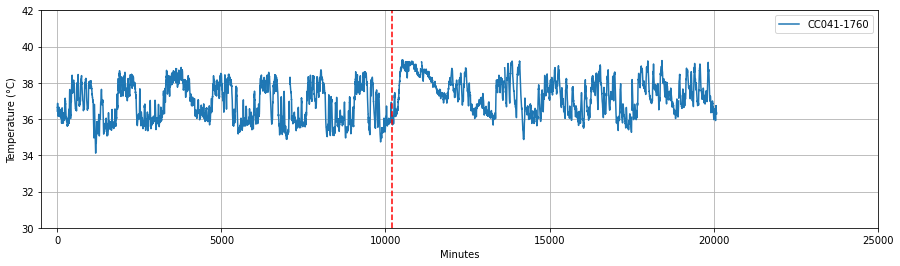

In [25]:
fig, ax = plt.subplots(figsize=(15, 4))
fig.set_facecolor("white")

# Plotting each file's temperature vs. minutes
for i in range(0, df_temp.shape[1]):
    ax.cla()  # clear axis for each individual mouse
    
    # Get the specific minutes for the current temperature time series
    mice_min = range(0, df_temp.shape[0])
    
    # Extract the temperature values for the current column
    mice_temp = df_temp.iloc[:, i].to_frame()
    
    # Get the column name for the current file
    names = mice_temp.columns[0]
    names
    # Plotting the time series
    ax.plot(mice_min, mice_temp, label=names)  # plotting the time series
    ax.grid(True)  # adding a grid
    ax.set_xlim(-500, 25000, 2000)
    ax.set_ylim(30, 42, 0.5)
    ax.set_xlabel("Minutes")  # x label
    ax.set_ylabel('Temperature (°C)')  # y label
    ax.legend()  # name of the mouse
    
    matching_columns = set(mice_temp.columns).intersection(infection_data.columns)
    
    if matching_columns:
        column_name = matching_columns.pop()
        infection_time = infection_data.loc['Aprprox Infection Minute', column_name]
        # Add a vertical line at the infection time
        ax.axvline(x=infection_time, color='r', linestyle='--')
        print(f"Found '{column_name}' and its infection value is '{infection_time}'")
    else:
        print(f"No match found for mouse '{names}'")
    
    # Save each plot
    filename = "Infection/%s.png" % names  # saving the file as the name of the mouse
    fig.savefig(filename,tight)
